In [ ]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd


In [370]:
# peak_folder = 'selected_waveforms' ## put your own path
# sample = 'cosmics' #'PNS_neutrons'
# with open(f'{peak_folder}/selection_{sample}_wlenNone_prom500.pkl', 'rb') as file:
#    dic = pickle.load(file)
# data = pd.DataFrame(dic)
# print(f"{sample}:  {data.shape[0]} peaks, {data.trigger_record.unique().shape[0]} trigger records")

In [371]:
# # Plot all the available waveforms
# fig, ax = plt.subplots(1, 1, figsize=(5, 5))
# for wf in data.waveform:
#     ax.plot(wf.transpose())
# ax.set_xlabel(r"$\mathrm{\bf Time\ ticks}$")
# ax.set_ylabel(r"$\mathrm{\bf ADC\ counts}$");
# ax.set_title(sample);

In [372]:
# ## trigger records between 1 and 3 
# fig, ax = plt.subplots(1, 1, figsize=(5, 5))
# for wf in data.loc[(data.trigger_record.between(1, 3)), 'waveform']:
#     ax.plot(wf.transpose())
# ax.set_xlabel(r"$\mathrm{\bf Time\ ticks}$")
# ax.set_ylabel(r"$\mathrm{\bf ADC\ counts}$");
# ax.set_title(sample);

In [373]:
# fig, ax = plt.subplots(1, 1, figsize=(5, 5))
# for wf in data.loc[(data.trigger_record.between(1, 3)), 'waveform_padded']:
#     ax.plot(wf.transpose())
# ax.set_xlabel(r"$\mathrm{\bf Time\ ticks}$")
# ax.set_ylabel(r"$\mathrm{\bf ADC\ counts}$");
# ax.set_title(sample);

In [374]:
# === LOAD the data and pad for each sample ===
def load_and_pad(sample_name, peak_folder='selected_waveforms', pad_length=500):
    with open(f'{peak_folder}/selection_{sample_name}_wlenNone_prom500.pkl', 'rb') as file:
        dic = pickle.load(file)
    data = pd.DataFrame(dic)
    print(f"{sample_name}: {data.shape[0]} peaks, {data.trigger_record.nunique()} trigger records")

    # Pad waveforms
    data['waveform_padded'] = [
        np.pad(wf, (0, pad_length - len(wf))) if len(wf) < pad_length else wf[:pad_length]
        for wf in data['waveform']
    ]
    return data

In [375]:
cosmics = load_and_pad('cosmics')
PNS = load_and_pad('PNS')
PNS_neutrons = load_and_pad('PNS_neutrons')
PNS_SB = load_and_pad('PNS_SideBand')

cosmics: 25150 peaks, 4189 trigger records
PNS: 46228 peaks, 14283 trigger records
PNS_neutrons: 3780 peaks, 3187 trigger records
PNS_SideBand: 39102 peaks, 13893 trigger records


In [376]:
cosmics.head()

,trigger_record,waveform_index,height,width,pedestal,waveform,waveform_padded
0,0,0,419,195.350000,1303,"[-92, -84, -75, -84, -85, -77, -69, -66, -51, ...","[-92, -84, -75, -84, -85, -77, -69, -66, -51, ..."
1,0,1,1148,166.122199,1303,"[-2, 41, 161, 322, 488, 619, 738, 806, 859, 88...","[-2, 41, 161, 322, 488, 619, 738, 806, 859, 88..."
2,0,2,2252,192.744797,1303,"[89, 391, 788, 1155, 1487, 1780, 1994, 2125, 2...","[89, 391, 788, 1155, 1487, 1780, 1994, 2125, 2..."
3,0,3,462,169.719328,1303,"[-44, -27, 5, 94, 176, 242, 294, 337, 364, 388...","[-44, -27, 5, 94, 176, 242, 294, 337, 364, 388..."
4,0,4,558,146.478022,1303,"[-30, -16, 10, 65, 151, 252, 340, 374, 401, 47...","[-30, -16, 10, 65, 151, 252, 340, 374, 401, 47..."


In [377]:
# === Extract and pad waveforms ===
# Make waveforms of same length
# def pad_waveforms(input_data, pad_length=500):
#  output_data = input_data
#  output_data['waveform_padded'] = [np.pad(wf, (0, pad_length - len(wf))) if len(wf) < pad_length else wf[:pad_length] for wf in output_data['waveform']]
#  return output_data

In [378]:
#cosmics = pad_waveforms(data, 500)
#PNS = pad_waveforms(PNS, 500)
#PNS_neutrons = pad_waveforms(PNS_neutrons, 500)
#PNS_SB = pad_waveforms(PNS_SB, 500)
#print(cosmics)

In [379]:
# === Stack padded waveforms into a matrix ===
# waveforms = np.stack(cosmics['waveform_padded'].values)
# print(waveforms)
# areas = waveforms.sum(axis=1)
# print(np.any(areas == 0))  # Is the area zero -> False


In [380]:
# === Average waveforms ===
#avg_waveform = waveforms.mean(axis=0)
#print(avg_waveform)
def compute_avg_waveform(padded_data):
    waveforms = np.stack(padded_data['waveform_padded'].values)
    return waveforms.mean(axis=0)

In [381]:
avg_cosmics = compute_avg_waveform(cosmics)
avg_PNS = compute_avg_waveform(PNS)
avg_neutrons = compute_avg_waveform(PNS_neutrons)
avg_SB = compute_avg_waveform(PNS_SB)


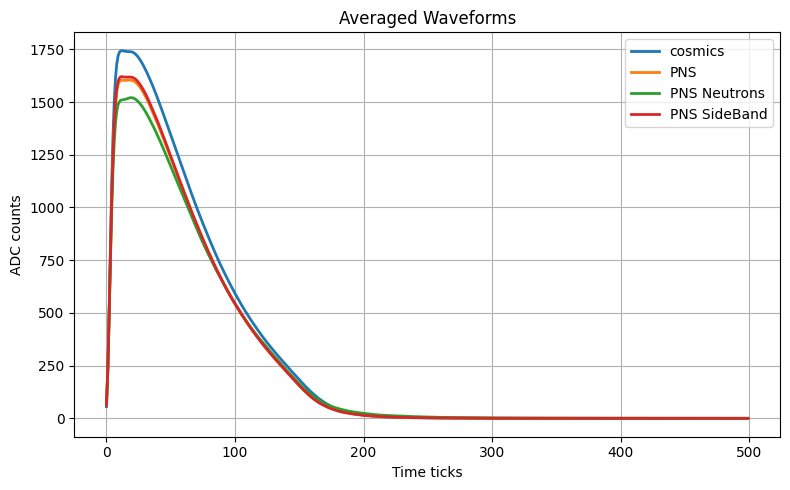

In [382]:
# === Plot Averaged Waveforms ===
plt.figure(figsize=(8, 5))
plt.plot(avg_cosmics, label='cosmics', linewidth=2)
plt.plot(avg_PNS, label='PNS', linewidth=2)
plt.plot(avg_neutrons, label='PNS Neutrons', linewidth=2)
plt.plot(avg_SB, label='PNS SideBand', linewidth=2)
plt.xlabel("Time ticks")
plt.ylabel("ADC counts")
plt.title(f"Averaged Waveforms")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [383]:
# === Normalize each waveform by area, then average ===
def compute_avg_waveform_norm(padded_data):
    waveforms = np.stack(padded_data['waveform_padded'].values)
    normalized_waveforms = waveforms / waveforms.sum(axis=1, keepdims=True)
    #print(avg_waveform_norm)
    return normalized_waveforms.mean(axis=0)

In [384]:
avg_cosmics_norm = compute_avg_waveform_norm(cosmics)
avg_PNS_norm = compute_avg_waveform_norm(PNS)
avg_neutrons_norm = compute_avg_waveform_norm(PNS_neutrons)
avg_SB_norm = compute_avg_waveform_norm(PNS_SB)

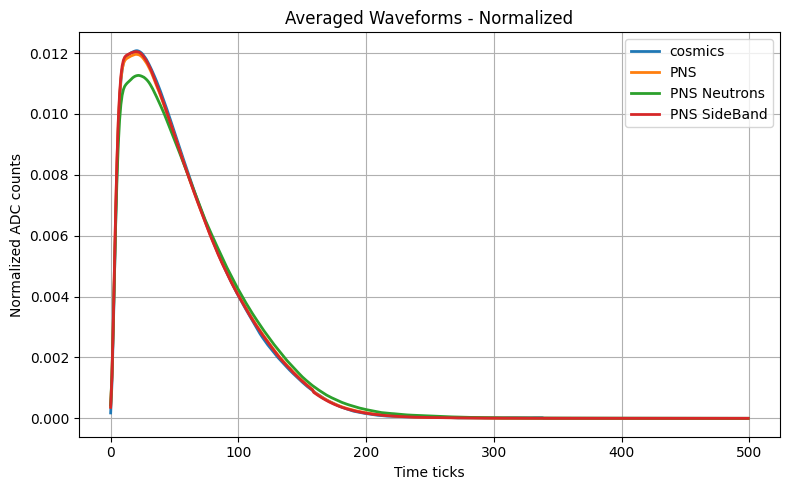

In [385]:
# === Plot Averaged Waveforms ===
plt.figure(figsize=(8, 5))
plt.plot(avg_cosmics_norm, label='cosmics', linewidth=2)
plt.plot(avg_PNS_norm, label='PNS', linewidth=2)
plt.plot(avg_neutrons_norm, label='PNS Neutrons', linewidth=2)
plt.plot(avg_SB_norm, label='PNS SideBand', linewidth=2)
plt.xlabel("Time ticks")
plt.ylabel("Normalized ADC counts")
plt.title(f"Averaged Waveforms - Normalized")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [386]:
# # === Compute Prompt Fraction =====
def compute_prompt_fraction(waveform, t_prompt=50, dt=1.0):
    """   
    Compute the prompt fraction of a waveform relative to its full integral.

    Parameters:
    - waveform: 1D array of ADC values
    - t_prompt: prompt window duration in ns 
    - dt: time resolution in ns per tick 
    """
    n_prompt = int(t_prompt / dt)
    end_prompt = min(len(waveform), n_prompt)

    int_prompt = np.sum(waveform[:end_prompt])
    int_total = np.sum(waveform)
    # print('int_prompt')
    # print(int_prompt)
    # print('int_total')
    # print(int_total)
    if int_total == 0:
        return np.nan
    f_prompt = int_prompt / int_total
    return f_prompt, int_total

In [387]:
def extract_fprompt_vs_integral(padded_data, t_prompt=50, dt=1.0):
    f_prompts = []
    integrals = []

    for wf in padded_data['waveform_padded']:
        f_prompt, total = compute_prompt_fraction(wf, t_prompt, dt)
        if not np.isnan(f_prompt):
            f_prompts.append(f_prompt)
            integrals.append(total)

    return np.array(integrals), np.array(f_prompts)


In [388]:
ints_cosmics, fps_cosmics = extract_fprompt_vs_integral(cosmics)
ints_PNS, fps_PNS = extract_fprompt_vs_integral(PNS)
ints_neutrons, fps_neutrons = extract_fprompt_vs_integral(PNS_neutrons)
ints_SB, fps_SB = extract_fprompt_vs_integral(PNS_SB)

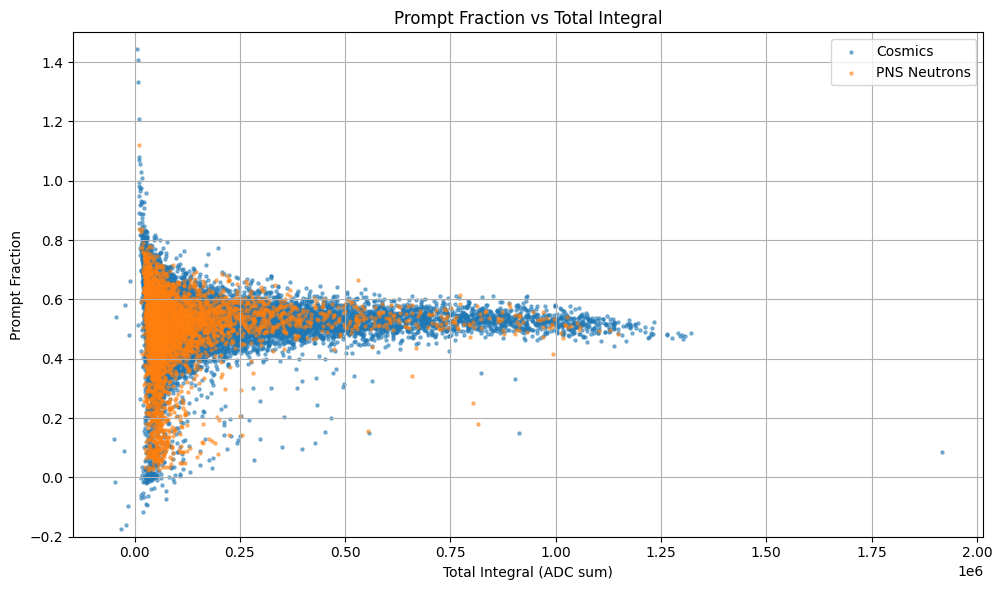

In [389]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(ints_cosmics, fps_cosmics, s=5, alpha=0.5, label='Cosmics')
plt.scatter(ints_neutrons, fps_neutrons, s=5, alpha=0.5, label='PNS Neutrons')
#plt.scatter(ints_SB, fps_SB, s=5, alpha=0.5, label='PNS Sidebands')
#plt.scatter(ints_PNS, fps_PNS, s=5, alpha=0.5, label='PNS')

plt.xlabel("Total Integral (ADC sum)")
plt.ylabel("Prompt Fraction")
plt.title("Prompt Fraction vs Total Integral")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.ylim(-0.2, 1.50)
plt.show()


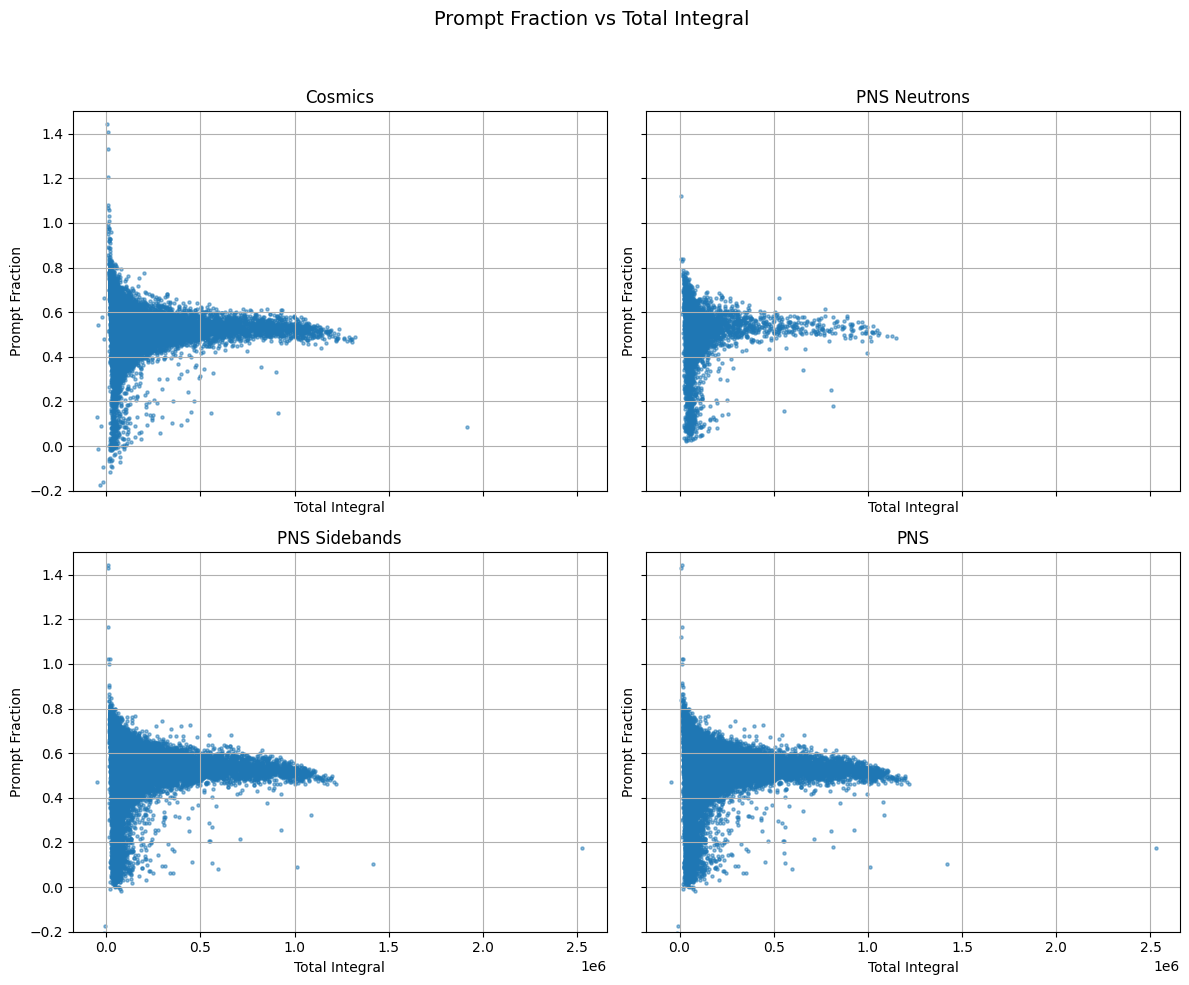

In [390]:
#===Seprate Plots ====
fig, axs = plt.subplots(2, 2, figsize=(12, 10), sharex=True, sharey=True)

samples = [
    ("Cosmics", ints_cosmics, fps_cosmics),
    ("PNS Neutrons", ints_neutrons, fps_neutrons),
    ("PNS Sidebands", ints_SB, fps_SB),
    ("PNS", ints_PNS, fps_PNS),
]

for ax, (label, x, y) in zip(axs.ravel(), samples):
    ax.scatter(x, y, s=5, alpha=0.5)
    ax.set_title(label)
    ax.set_xlabel("Total Integral")
    ax.set_ylabel("Prompt Fraction")
    ax.set_ylim(-0.2, 1.5)
    ax.grid(True)

plt.suptitle("Prompt Fraction vs Total Integral ", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


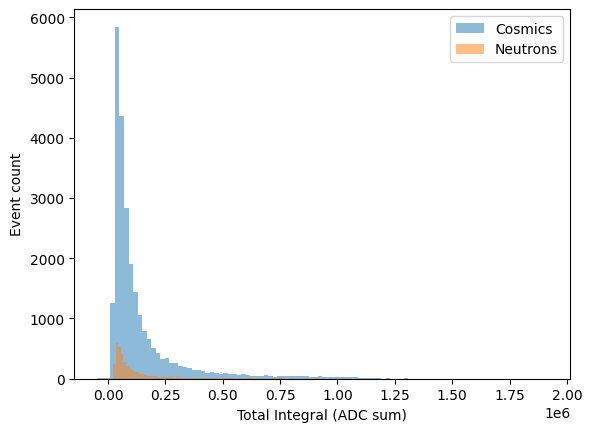

In [395]:
plt.hist(ints_cosmics, bins=100, alpha=0.5, label='Cosmics')
plt.hist(ints_neutrons, bins=100, alpha=0.5, label='Neutrons')
mean_cosmics = np.mean(ints_cosmics)
mean_neutrons = np.mean(ints_neutrons)
plt.xlabel("Total Integral (ADC sum)")
plt.ylabel("Event count")
plt.legend()
#plt.title(" ")
plt.show()


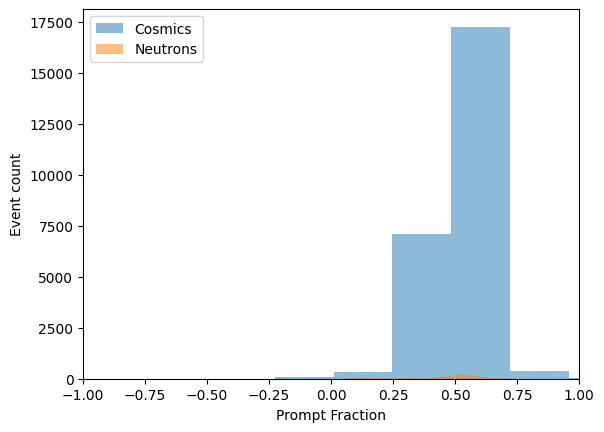

In [398]:
plt.hist(fps_cosmics, bins=100, alpha=0.5, label='Cosmics')
plt.hist(fps_neutrons, bins=100, alpha=0.5, label='Neutrons')
mean_cosmics = np.mean(ints_cosmics)
mean_neutrons = np.mean(ints_neutrons)
plt.xlabel("Prompt Fraction")
plt.ylabel("Event count")
plt.xlim(-1,1)
plt.legend()
#plt.title(" ")
plt.show()